<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Visualisation</h1><h2>Assignment 2</h2><h3>
    </tr>
</table>

#### Cesar Chen Peralta Jr II / S10205582

### 1. [Data Preparation](#part1)
   - [1.1 Load Data](#part1.1)
   - [1.2 Clean Data](#part1.2)
   
### 2. [Visualisations](#part2)
   - [2.1 Data Analysis](#part2.1)
   - [2.2 Visualisations](#part2.2)
  
### 3. [Dashboards](#part3)

## 1. Data Preparation <a id="part1"></a>
###  1.1 Load Data <a id="part1.1"></a> 

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns
import squarify
import plotly.express as px

In [2]:
# Load data into a pandas dataframe from a csv file
filename = 'Fitness Trainer Series.csv '
df = pd.read_csv(filename)

In [3]:
# Create copy of dataframe
df_bkup = df.copy()

###  1.2 Clean Data <a id="part1.2"></a> 

In [4]:
# Fill the empty cells with 'NaN'
df.replace('na',np.nan,inplace = True)
df.fillna(np.nan,inplace = True)

In [5]:
# Check for missing values in df
df.isnull().sum()

Product           0
Branch            0
Age               9
Gender            3
Education         3
MaritalStatus     3
Usage            11
Fitness           3
Income            3
Miles             3
dtype: int64

In [6]:
# Drop rows with missing values in 'Gender'
df = df.dropna(subset = ['Gender'])
df.isnull().sum()

Product          0
Branch           0
Age              6
Gender           0
Education        0
MaritalStatus    0
Usage            8
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
# Replace incorrect values in 'MaritalStatus'
df['MaritalStatus'].replace('P', 'Partnered', inplace = True)
df['MaritalStatus'].replace('S', 'Single', inplace = True)

In [8]:
# Replace missing values in 'Age' and 'Usage'
median_age = df['Age'].median()
df['Age'].replace(np.nan, median_age, inplace = True)

median_usage = df['Usage'].median()
df['Usage'].replace(np.nan, median_usage, inplace=True)

In [9]:
# Check if there are any missing values left
df.isnull().any()

Product          False
Branch           False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [10]:
# View the number of items and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Branch         180 non-null    object
 2   Age            180 non-null    object
 3   Gender         180 non-null    object
 4   Education      180 non-null    object
 5   MaritalStatus  180 non-null    object
 6   Usage          180 non-null    object
 7   Fitness        180 non-null    object
 8   Income         180 non-null    object
 9   Miles          180 non-null    object
dtypes: object(10)
memory usage: 15.5+ KB


In [11]:
# Correct the data types
df['Age'] = df['Age'].astype(int)
df['Education'] = df['Education'].astype(int)
df['Usage'] = df['Usage'].astype(int)
df['Fitness'] = df['Fitness'].astype(int)
df['Income'] = df['Income'].astype(int)
df['Miles'] = df['Miles'].astype(int)

# View the new data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Branch         180 non-null    object
 2   Age            180 non-null    int32 
 3   Gender         180 non-null    object
 4   Education      180 non-null    int32 
 5   MaritalStatus  180 non-null    object
 6   Usage          180 non-null    int32 
 7   Fitness        180 non-null    int32 
 8   Income         180 non-null    int32 
 9   Miles          180 non-null    int32 
dtypes: int32(6), object(4)
memory usage: 11.2+ KB


## 2. Visualisations <a id="part2"></a>
### 2.1 Data Analysis <a id="part2.1"></a>

In [12]:
# Set figure theme
sns.set_theme(style='ticks')

# Pair plot
sns.pairplot(df)

#Display the plot
plt.show()

In [14]:
# Set figure theme
sns.set_theme(style='ticks')

# Pair plot
sns.pairplot(df, hue='Product')

#Display the plot
plt.show()

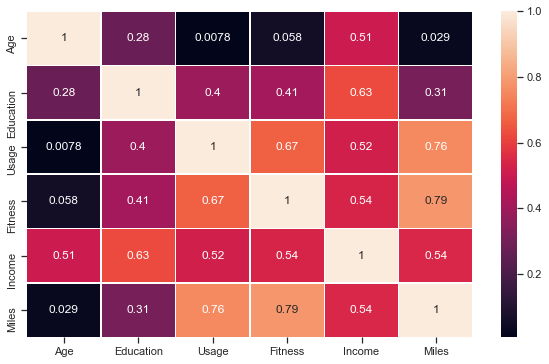

In [15]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Calculate correlations of feature-pairs in df_stats
corr = df.corr()

# Create heatmap
sns.heatmap(corr, annot = True, linewidths = 0.5)

# Display the plot
plt.show()

### 2.2 Visualisations <a id="part2.2"></a>

In [16]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count number of products
frequency = df.Product.value_counts()
labels = frequency.index
colors = ['#d87c6c', '#b8546c', '#803c6c']

# Create pie chart
plt.pie(frequency, labels = labels, autopct = '%1.1f%%', 
        shadow = True, explode = (0.05,0.05,0.05), colors=colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,'180', ha='center',va='center', fontsize=20)
plt.title('Proportion of Treadmill Models Sold', fontsize=20)

# Display chart
plt.show()

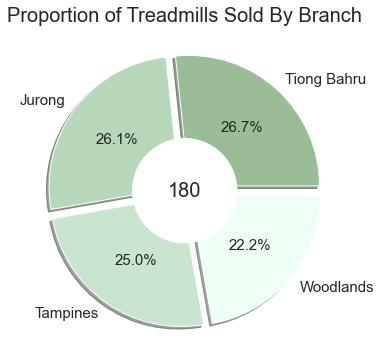

In [17]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count number of products
frequency = df.Branch.value_counts()
labels = frequency.index
#colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors = ['#9abd97', '#b6d7b9', '#c9e5d0', '#edfff4']

# Create pie chart
plt.pie(frequency, labels = labels, explode = (0.05, 0.05, 0.05, 0.05), 
       autopct = '%1.1f%%', shadow = True, colors = colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,'180', ha='center',va='center', fontsize=20)
plt.title('Proportion of Treadmills Sold By Branch', fontsize=20)

# Display chart
plt.show()

In [18]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
fig = px.histogram(df,x='Branch',color='Product',animation_frame='Product',
                  color_discrete_sequence=['#d87c6c', '#b8546c', '#803c6c'])

fig.update_layout(
    title={
        'text': "Distribution of Products Sold By Branch",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, showlegend=False)

# Display plot
fig.show()

<Figure size 720x432 with 0 Axes>

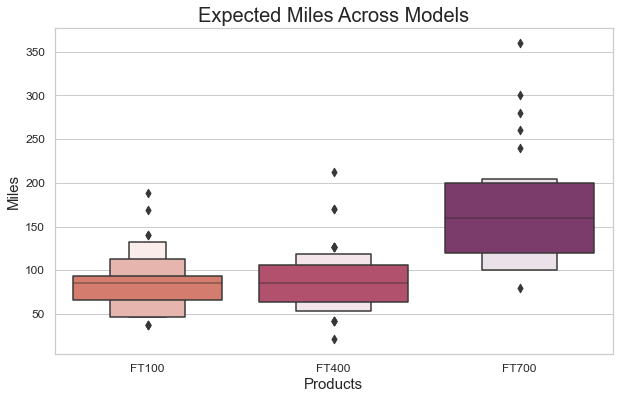

In [19]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create boxen plot
sns.set_style('whitegrid')
sns.boxenplot(x='Product', y='Miles', palette = 'flare', data=df)

# Decorate using Matplotlib
plt.title('Expected Miles Across Models', fontsize = 20)
plt.ylabel('Miles', fontsize = 15)
plt.xlabel('Products', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [20]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create violin plot
sns.set_style('whitegrid')
sns.boxenplot(x='Product', y='Usage', palette = 'flare', data=df)

# Decorate using Matplotlib
plt.title('Expected Usage Across Models', fontsize = 20)
plt.ylabel('Usage', fontsize = 15)
plt.xlabel('Products', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

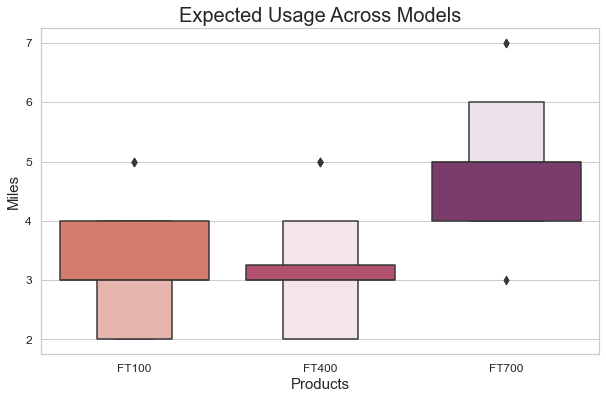

In [21]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create violin plot
sns.set_style('whitegrid')
sns.boxenplot(x='Product', y='Usage', palette = 'flare', data=df)

# Decorate using Matplotlib
plt.title('Expected Usage Across Models', fontsize = 20)
plt.ylabel('Miles', fontsize = 15)
plt.xlabel('Products', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [22]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create catplot
g = sns.catplot(data=df,x='Fitness',kind='count', hue='Product', palette = 'flare')

# Decorate using Matplotlib
plt.title('Distribution of Products Sold By Fitness Level', fontsize=20)
plt.xlabel('Fitness Level', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)

ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

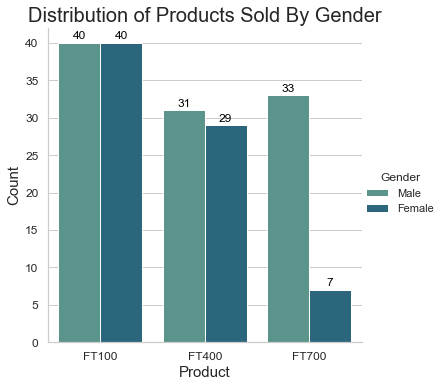

In [23]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create cat plot
g = sns.catplot(data=df,x='Product',kind='count', hue='Gender', palette = 'crest')

# Decorate using Matplotlib
plt.title('Distribution of Products Sold By Gender', fontsize=20)
plt.xlabel('Product', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)

ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.annotate(p.get_height(), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

<Figure size 720x432 with 0 Axes>

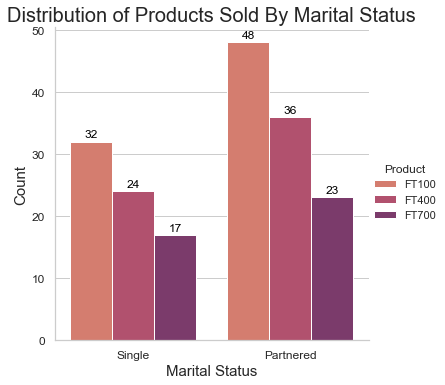

In [24]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create catplot
g = sns.catplot(data=df,x='MaritalStatus',kind='count', hue='Product', palette = 'flare')

# Decorate using Matplotlib
plt.title('Distribution of Products Sold By Marital Status', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)

ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.annotate(p.get_height(), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

In [25]:
# Set figure size
plt.figure(figsize=(10,6))

# Create violin plot
sns.violinplot(x='Product',y='Income',data=df, palette='flare')

# Decorate using Matplotlib
plt.title('Distribution of Products Sold By Income', fontsize=20)
plt.xlabel('Product', fontsize=15)
plt.ylabel('Income ($)', fontsize=15)

# Display plot
plt.show()

In [26]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create violin plot
sns.set_style('whitegrid')
sns.violinplot(x='Product', y='Age', palette = 'flare', data=df)

# Decorate using Matplotlib
plt.title('Customer Age Across Models', fontsize = 20)
plt.ylabel('Age', fontsize = 15)
plt.xlabel('Products', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

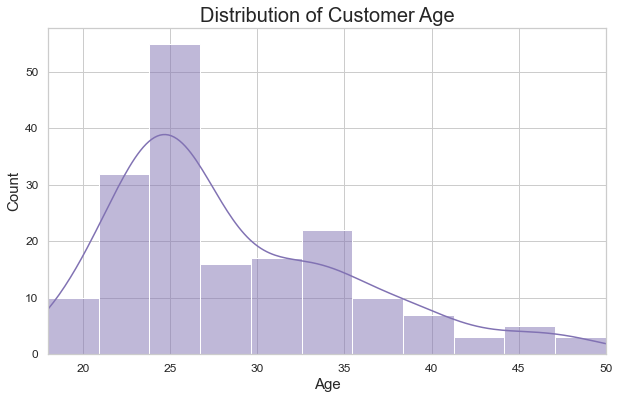

In [27]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='Age', kde = True, color = 'm',data=df)

# Decorate using Matplotlib
plt.title('Distribution of Customer Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(18,50)
plt.ylim(0, None)

# Display plot
plt.show()

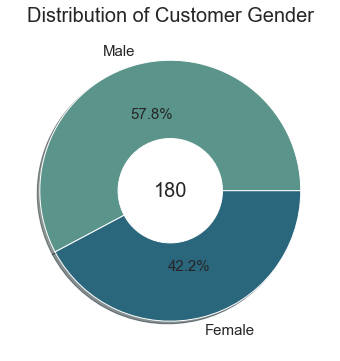

In [28]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count number of products
frequency = df.Gender.value_counts()
labels = frequency.index
colors = ['#5a948a', '#2a667c']

# Create pie chart
plt.pie(frequency, labels = labels, autopct = '%1.1f%%', 
        shadow = True, colors=colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,'180', ha='center',va='center', fontsize=20)
plt.title('Distribution of Customer Gender', fontsize=20)

# Display chart
plt.show()

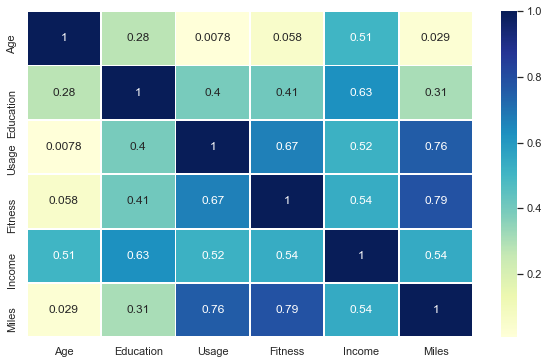

In [29]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Calculate correlations of feature-pairs in df_stats
corr = df.corr()
 
# Create heatmap
sns.heatmap(corr, annot = True, linewidths = 1
           ,cmap = 'YlGnBu')

# Display the plot
plt.show()

<Figure size 720x432 with 0 Axes>

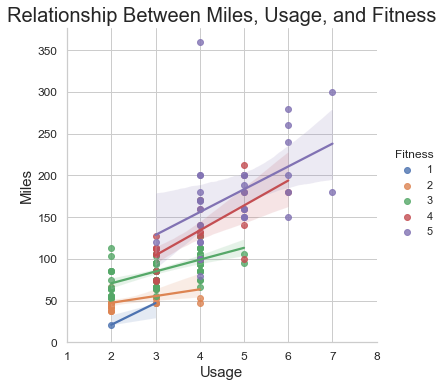

In [30]:
# Set figure size with matplotlib
plt.figure(figsize = (10,6))

# Create scatterplot
sns.lmplot(x='Usage', y='Miles', hue='Fitness', data=df)

# Decorate using Matplotlib
plt.title('Relationship Between Miles, Usage, and Fitness', fontsize=20)
plt.xlabel('Usage', fontsize=15)
plt.ylabel('Miles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)
plt.xlim(1, 8)

# Display the plot
plt.show()

<Figure size 720x432 with 0 Axes>

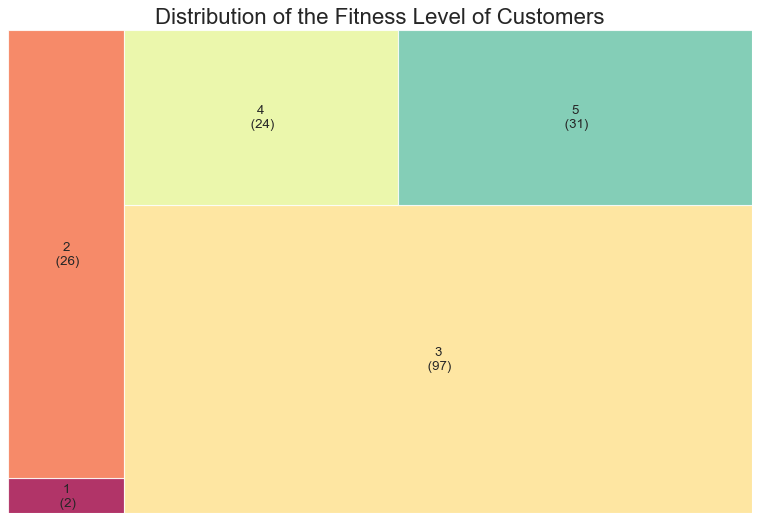

In [31]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Prepare Data
dx = df.groupby('Fitness').size().reset_index(name='counts')
labels = dx.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dx['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate using Matplotlib
plt.title('Distribution of the Fitness Level of Customers', fontsize=20)
plt.axis('off')

# Display the plot
plt.show()

## 3. Dashboards <a id='part3' />

[]

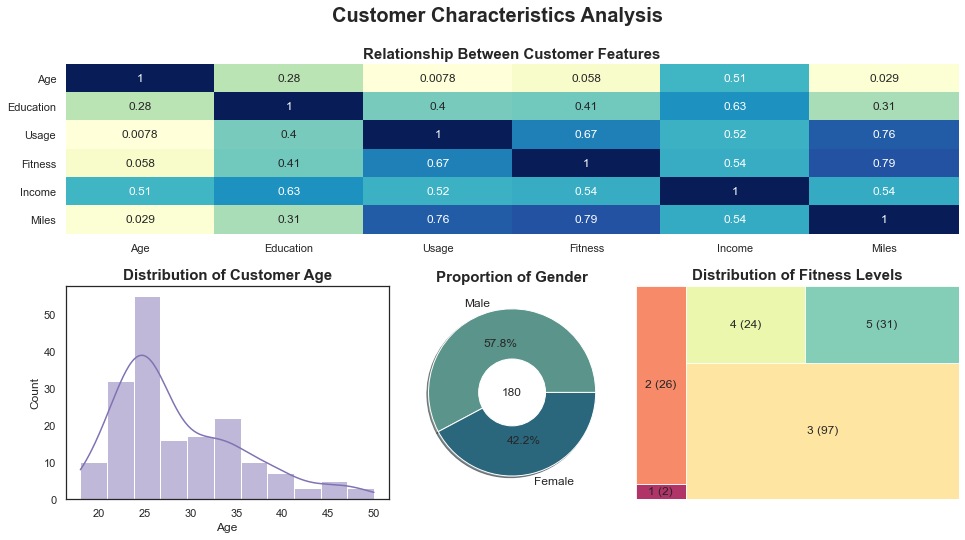

In [32]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(16,8), constrained_layout=False)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=10, ncols=8, figure=fig)

sns.set_style('white')

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0:4, :])
ax2 = fig.add_subplot(gs[5:10, 5:8])
ax3 = fig.add_subplot(gs[5:10, 0:3])
ax4 = fig.add_subplot(gs[5:10, 3:5])

# Plot heatmap
corr = df.corr()
ax1 = sns.heatmap(corr, annot = True, cmap = 'YlGnBu', ax = ax1, cbar = False)
ax1.set_title('Relationship Between Customer Features', fontsize=15, fontweight='bold')

# Prepare Data
dx = df.groupby('Fitness').size().reset_index(name='counts')
labels = dx.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
sizes = dx['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
# Plot treemap
ax2 = squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, ax = ax2)
ax2.axis('off')
ax2.set_title('Distribution of Fitness Levels', fontsize=15, fontweight='bold')

# Plot histogram
ax3 = sns.histplot(x='Age', kde = True, color = 'm',data=df, ax = ax3)
ax3.set_title('Distribution of Customer Age', fontsize=15, fontweight='bold')

# Count number of products
colors = ['#5a948a', '#2a667c']
# Plot pie chart
ax4 = df.Gender.value_counts().plot.pie(autopct = '%1.1f%%', 
        shadow = True, colors=colors, ax = ax4, textprops = {'fontsize':12})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax4.axis('off')
ax4.set_title('Proportion of Gender', fontsize=15, fontweight='bold')
ax4.text(0,0,'180', ha='center',va='center', fontsize=12)

# Decorate using Matplotlib
fig.suptitle("Customer Characteristics Analysis", fontsize=20, fontweight='bold')

# Display plot
plt.plot()

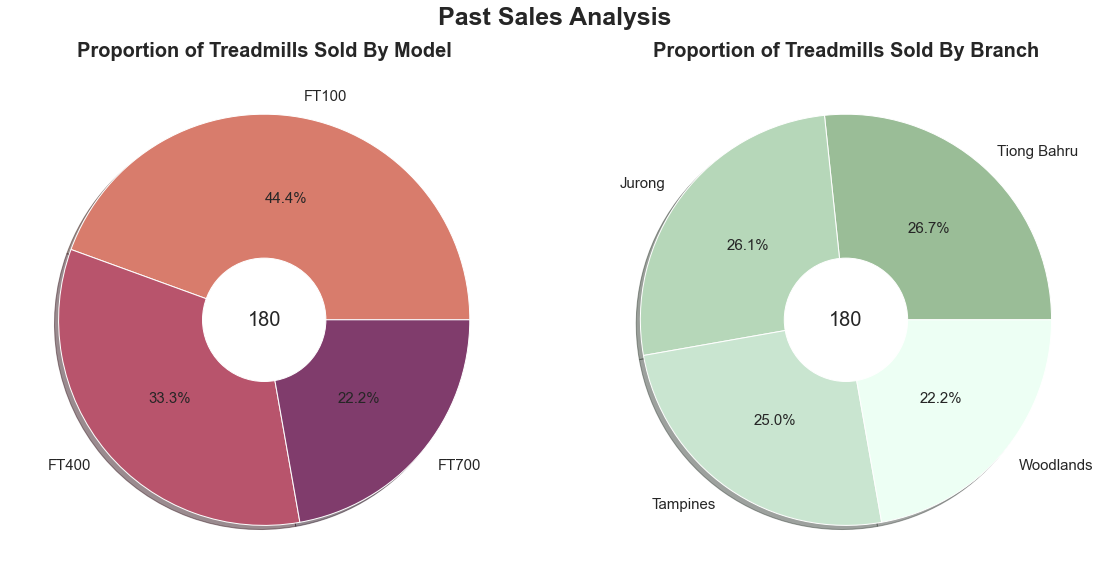

In [33]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(16,8), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=1, ncols=2, figure=fig)

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

colors = ['#d87c6c', '#b8546c', '#803c6c']
# Plot pie chart
ax1 = df.Product.value_counts().plot.pie(autopct = '%1.1f%%', 
        shadow = True, colors=colors, ax=ax1, textprops = {'fontsize':15})
# Draw centre circle
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
ax1.add_artist(centre_circle)
ax1.axis('off')
ax1.set_title('Proportion of Treadmills Sold By Model', fontsize=20, fontweight='bold')
ax1.text(0,0,'180', ha='center',va='center', fontsize=20)

#colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors = ['#9abd97', '#b6d7b9', '#c9e5d0', '#edfff4']
# Plot pie chart
ax2 = df.Branch.value_counts().plot.pie( 
       autopct = '%1.1f%%', shadow = True, colors = colors, ax=ax2, textprops = {'fontsize':15})
# Draw centre circle
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('off')
ax2.set_title('Proportion of Treadmills Sold By Branch', fontsize=20, fontweight='bold')
ax2.text(0,0,'180', ha='center',va='center', fontsize=20)

# Decorate using Matplotlib
fig.suptitle("Past Sales Analysis", fontsize=25, fontweight='bold')

# Display chart
plt.show()

In [34]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(16,8), constrained_layout=False)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=2, figure=fig)

# Set style
sns.set_style("dark")

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('Products Sold By Fitness Level', fontsize=15, fontweight='bold')
ax1.set_xlabel('Fitness', fontsize = 14)
ax1.set_ylabel('Count', fontsize = 14)

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Products Sold By Expected Miles', fontsize=15, fontweight='bold')
ax2.set_xlabel('Product', fontsize = 14)
ax2.set_ylabel('Miles', fontsize = 14)

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title('Products Sold By Planned Usage', fontsize=15, fontweight='bold')
ax3.set_xlabel('Product', fontsize = 14)
ax3.set_ylabel('Usage', fontsize = 14)

# Plot countplot
ax1 = sns.countplot(x='Fitness',hue='Product', palette='flare', data=df,alpha=1, ax=ax1)

# Plot boxen plot
ax2 = sns.boxenplot(x='Product', y='Miles', palette = 'flare', data=df, ax=ax2)

# Plot boxen plot
ax3 = sns.boxenplot(x='Product', y='Usage', palette='flare', data=df, ax=ax3)

# Decorate using Matplotlib
fig.suptitle("Treadmill Models By Customer Fitness", fontsize=20, fontweight='bold')

# Display plot
plt.show()

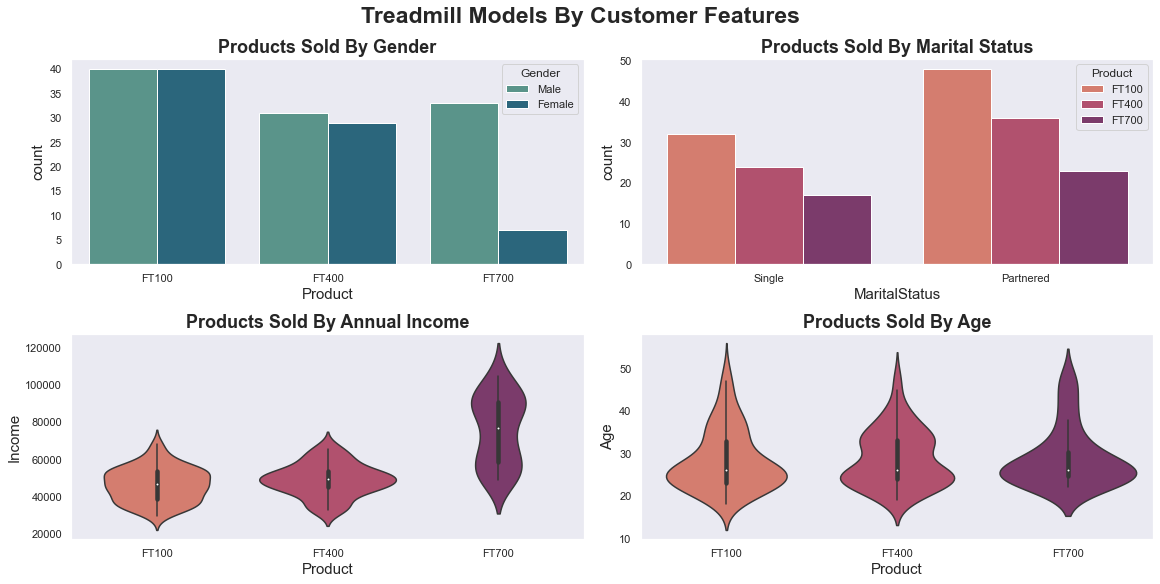

In [35]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(16,8), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=2, figure=fig)

# Set style
sns.set_style("dark")

# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Products Sold By Gender', fontsize=18, fontweight='bold')
ax1.set_xlabel('Product', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Products Sold By Marital Status', fontsize=18, fontweight='bold')
ax2.set_xlabel('Marital Status', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_title('Products Sold By Annual Income', fontsize=18, fontweight='bold')
ax3.set_xlabel('Product', fontsize = 15)
ax3.set_ylabel('Income', fontsize = 15)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_title('Products Sold By Age', fontsize=18, fontweight='bold')
ax4.set_xlabel('Product', fontsize = 15)
ax4.set_ylabel('Age', fontsize = 15)

# Plot countplot
ax1 = sns.countplot(data =df,x='Product', hue='Gender', palette = 'crest', ax = ax1)

# Plot countplot
ax2 = sns.countplot(data=df,x='MaritalStatus', hue='Product', palette = 'flare', ax = ax2)

# Plot violin plot
ax3 = sns.violinplot(x='Product',y='Income',data=df, palette='flare', ax = ax3)

# Plot violin plot
ax4 = sns.violinplot(x='Product', y='Age', palette = 'flare', data=df, ax = ax4)

# Decorate using Matplotlib
fig.suptitle("Treadmill Models By Customer Features", fontsize=23, fontweight='bold')

# Display plot
plt.show()